In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('drug200.csv')

# Display the first few rows
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('drug200.csv')

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Encode the Drug column
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Now the 'Drug' column will be in numeric format
print(data.head())


   Age Sex      BP Cholesterol  Na_to_K  Drug
0   23   F    HIGH        HIGH   25.355     0
1   47   M     LOW        HIGH   13.093     3
2   47   M     LOW        HIGH   10.114     3
3   28   F  NORMAL        HIGH    7.798     4
4   61   F     LOW        HIGH   18.043     0


In [5]:
# Define features (X) and target (y)
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Convert categorical features (like Sex, BP, Cholesterol) to numerical format
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.2097 - loss: 1.6228 - val_accuracy: 0.2500 - val_loss: 1.6895
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3347 - loss: 1.5188 - val_accuracy: 0.4062 - val_loss: 1.5437
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5950 - loss: 1.3979 - val_accuracy: 0.5312 - val_loss: 1.4317
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6049 - loss: 1.3514 - val_accuracy: 0.6875 - val_loss: 1.3319
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6507 - loss: 1.2105 - val_accuracy: 0.7812 - val_loss: 1.2439
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6777 - loss: 1.1574 - val_accuracy: 0.7500 - val_loss: 1.1706
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7087 - loss: 1.0548 - val_accuracy: 0.7812 - val_loss: 1.1019
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7026 - loss: 1.0412 - val_accuracy: 0.7812 - val_loss: 1.0418

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9563 - loss: 0.1560 
Test Accuracy: 0.95


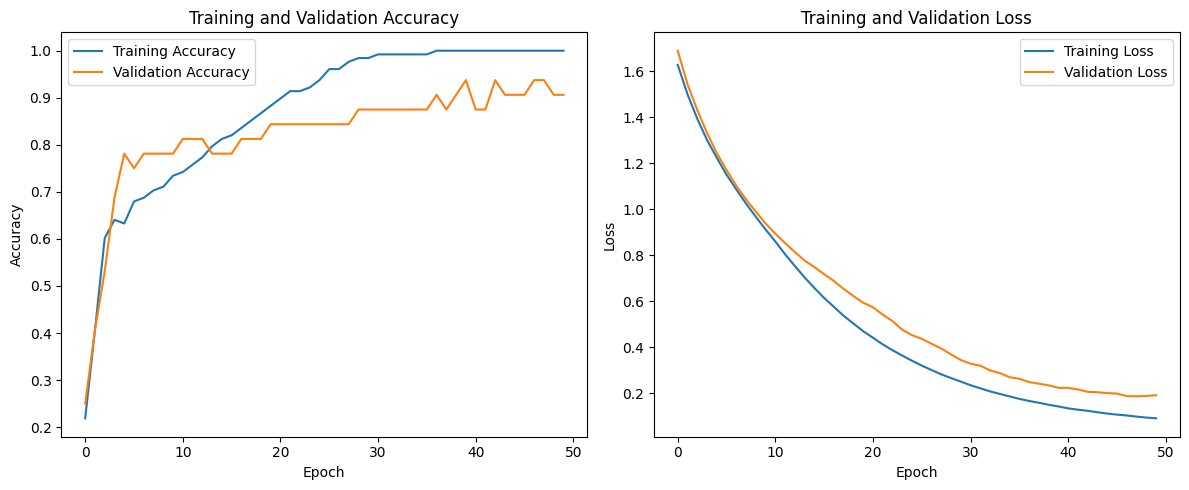

In [10]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with the history object
plot_training_history(history)
